## USAC E-Rate funding analysis

This notebook shows analysis of trens in USAC E-Rate funding between time period of 2016 to 2018
Below is the table of contents:

1. [How data was pulled using python?](#1.-Data-Pulling)
2. [Funding trends for last 3 years](#2.-Funding-trends-for-last-3-years)
3. [State-wise Funding Trend](#3.-State-wise-Funding-Trend)
4. [Service-wise Funding Trend](#4.-Service-wise-Funding-Trend)
5. [Organization-wise Funding Trend](#5.-Organization-wise-Funding-Trend)
6. [Reveal Source Code](#6.-Source-Code)


### 1. Data Pulling
Data was pulled using SODA API

In [1]:

import json
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Looping over data for 16 times by increasing 50K each time
j=0
merged_list=[]
for i in range(1,17):
    filters={'form_version':'Original','is_certified_in_window':'In Window','$limit':50000,'$offset':j}
    response = requests.get('https://opendata.usac.org/resource/qdmp-ygft.json',params=filters)
    todos = json.loads(response.text)    
    merged_list = merged_list + todos
    j+=50000


df = pd.DataFrame(merged_list) 

r, c = df.shape



### 2. Funding trends for last 3 years
1. As observed in the below table, both funding amount and number of requests has been decreasing steadily
2. On the other hand, amount requested per funding requested has been increasing steadily as well

In [4]:
years = ['2016','2017','2018']
dfr=df[df.funding_year.isin(years)]
dfr.head()
dfr.shape
#aggregating # of frn and dollar amount by year
frn_by_year = pd.DataFrame(dfr.groupby("funding_year")["funding_request_number"].count())
frn_by_year.head(10)

pd.options.display.float_format = '{:.2f}'.format
dfr['funding_commitment_request'] = dfr['funding_commitment_request'].astype(float)
amount_by_year = pd.DataFrame(dfr.groupby("funding_year")["funding_commitment_request"].sum())
amount_by_year.head(10)


dfr_merged = pd.merge(frn_by_year, amount_by_year, on='funding_year')

dfr_merged['amount_per_request'] = dfr_merged.funding_commitment_request/ dfr_merged.funding_request_number

dfr_merged = dfr_merged.reset_index()
dfr_merged

dfr_clean = dfr_merged

dfr_clean['funding_commitment_request'] = dfr_clean['funding_commitment_request'].apply(lambda x: "${:.1f}B".format((x/1000000000)))
dfr_clean['amount_per_request'] = dfr_clean['amount_per_request'].apply(lambda x: "${:.1f}K".format((x/1000)))
dfr_clean.funding_request_number.apply(lambda x : "{:,}".format(x))
cols = ['Funding Year','# of funding requests','Total funding amount requested','Amount per funding request']
dfr_clean.columns=cols



In [5]:
#total funding amount by year 2016
df_2016 = dfr[dfr['funding_year']=='2016']
df_2016
funding_requested_2016 = df_2016['funding_commitment_request'].sum()

#total funding amount by year 2017
df_2017 = dfr[dfr['funding_year']=='2017']
df_2017
funding_requested_2017 = df_2017['funding_commitment_request'].sum()


#total funding amount by year 2018
df_2018 = dfr[dfr['funding_year']=='2018']
df_2018
funding_requested_2018 = df_2018['funding_commitment_request'].sum()

#total funding requests by year 2016
df_2016 = dfr[dfr['funding_year']=='2016']
df_2016
funding_requested_2016 = df_2016['funding_commitment_request'].sum()
funding_request_count_2016 = df_2016['funding_request_number'].count()

#total funding requests by year 2017
df_2017 = dfr[dfr['funding_year']=='2017']
df_2017
funding_requested_2017 = df_2017['funding_commitment_request'].sum()
funding_request_count_2017 = df_2017['funding_request_number'].count()

#total funding requests by year 2018
df_2018 = dfr[dfr['funding_year']=='2018']
df_2018
funding_requested_2018 = df_2018['funding_commitment_request'].sum()
funding_request_count_2018 = df_2018['funding_request_number'].count()







### 3. State-wise Funding Trend
1. California's contribution to funding amount has gone down by 3% (from 14% in 2016 to 11% in 2018) as shown below in the first table
2. In terms of absolute amount, the requested 37% lesser money in 2018 compared to 2016. The amount requested by each state is shown in the second table
3. New York as well has requested 24% lesser money in 2018 compared to 2016
4. Given the fact that two of the top requesters has decreased requested funding amount so significantly, it definitely has impacted the overall funding requested


In [8]:
#State wise request for funding numbers and amount by year


#Filtering out top 5 states - CA,TX,NY,FL
states = ['CA','TX','NY','FL','IL']
top_5_states=dfr[dfr.state.isin(states)]
state_amount = pd.pivot_table(top_5_states, index='state', columns='funding_year', values= "funding_commitment_request",aggfunc= sum)
state_amount

#Changing column names 
col_names = ('year_2016','year_2017','year_2018')
state_amount.columns=col_names
state_amount

#Calculating % of funding requested by state by year
state_amount['state_contribution_2016'] = state_amount.year_2016/funding_requested_2016
state_amount['state_contribution_2017'] = state_amount.year_2017/funding_requested_2017
state_amount['state_contribution_2018'] = state_amount.year_2018/funding_requested_2018

state_amount

state_amount = state_amount.reset_index()
state_amount

state_amount['state_contribution_2016']=(state_amount.state_contribution_2016)
state_amount['state_contribution_2017']=( state_amount.state_contribution_2017)
state_amount['state_contribution_2018']=( state_amount.state_contribution_2018)

colnames = ['state','year_2016','year_2017','year_2018','state_contribution_2016','state_contribution_2017','state_contribution_2018']
state_amount.columns=colnames

state_clean = state_amount

state_clean['year_2016'] = state_clean['year_2016'].apply(lambda x: "${:.1f}M".format((x/1000000)))
state_clean['year_2017'] = state_clean['year_2017'].apply(lambda x: "${:.1f}M".format((x/1000000)))
state_clean['year_2018'] = state_clean['year_2018'].apply(lambda x: "${:.1f}M".format((x/1000000)))

cols = ['State','Year_2016','Year_2017','Year_2018','Contribution_2016','Contribution_2017','Contribution_2018']
state_clean.columns=cols
state_amount



states_contribution = state_amount.loc[:,['State', 'Contribution_2016','Contribution_2017','Contribution_2018']]
states_contribution







,State,Contribution_2016,Contribution_2017,Contribution_2018
0,CA,0.14,0.11,0.11
1,FL,0.04,0.04,0.04
2,IL,0.04,0.04,0.04
3,NY,0.06,0.07,0.06
4,TX,0.08,0.08,0.12


In [260]:
states_years = state_amount.loc[:,['State', 'Year_2016','Year_2017','Year_2018']]
states_years


,State,Year_2016,Year_2017,Year_2018
0,CA,$520.0M,$371.4M,$325.9M
1,FL,$160.1M,$143.0M,$125.5M
2,IL,$133.2M,$144.9M,$112.1M
3,NY,$207.4M,$214.4M,$157.6M
4,TX,$302.5M,$272.4M,$355.3M


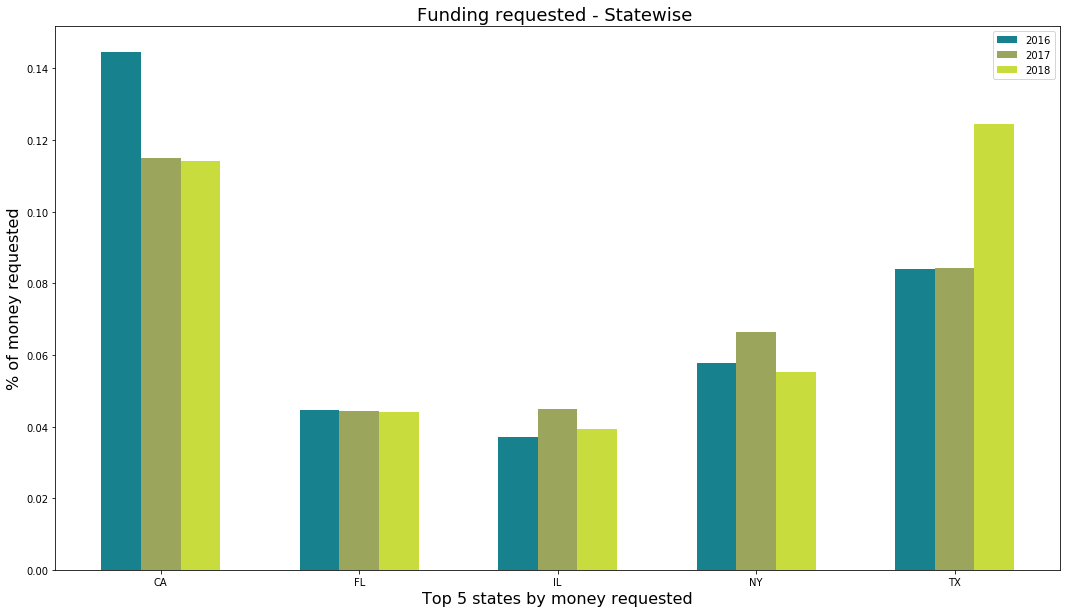

In [236]:
# Load Matplotlib and data wrangling libraries.
import matplotlib.pyplot as plt
import numpy as np


year_2016 = state_amount['Contribution_2016'].tolist()
year_2017 = state_amount['Contribution_2017'].tolist()
year_2018 = state_amount['Contribution_2018'].tolist()
states = state_amount['State'].tolist()
states_requesting=states
Year=['2016','2017','2018']
pos = np.arange(len(states_requesting))
bar_width = 0.20
Amount_Requested_2016=year_2016
Amount_Requested_2017=year_2017
Amount_Requested_2018=year_2018

r2 = [x + bar_width for x in pos]
r3 = [x + bar_width for x in r2]

plt.bar(pos,Amount_Requested_2016,bar_width,color='#17828d')
plt.bar(r2,Amount_Requested_2017,bar_width,color='#9ba55c')
plt.bar(r3,Amount_Requested_2018,bar_width,color='#c8dd3d')

 
plt.xticks(r2, states_requesting)
plt.xlabel('Top 5 states by money requested', fontsize=16)
plt.ylabel('% of money requested', fontsize=16)
plt.title('Funding requested - Statewise ',fontsize=18)
plt.legend(Year,loc=1)
plt.show()


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size



### 4. Service-wise Funding Trend
1. In 2016 "Voice" contributed to 40% of all the funding requests made. In 2018 this number went down to just 15%
2. In terms of absolute numbers, requests went down by over 75%
3. Given the fact that this service used to make up to majority of requests, because of severe decline in this, it has affected the overall number of funding requests made


In [263]:

#Filtering out top 3 services - CA,TX,NY,FL
services = ['Voice','Data Transmission and/or Internet Access','Internal Connections']
top_3_services=dfr[dfr.form_471_service_type_name.isin(services)]

#What type of services has been asked for
service_types_request = pd.pivot_table(top_3_services, index='form_471_service_type_name', columns='funding_year', values= "funding_request_number",aggfunc= 'count')
service_types_request


#Changing column names 
col_names = ('year_2016','year_2017','year_2018')
service_types_request.columns=col_names
service_types_request

#Calculating % of funding requested by state by year
service_types_request['service_contribution_2016'] = service_types_request.year_2016/funding_request_count_2016
service_types_request['service_contribution_2017'] = service_types_request.year_2017/funding_request_count_2017
service_types_request['service_contribution_2018'] = service_types_request.year_2018/funding_request_count_2018

service_types_request

service_types_request = service_types_request.reset_index()
col_names = ('Service_Type','year_2016','year_2017','year_2018','service_contribution_2016','service_contribution_2017','service_contribution_2018')
service_types_request.columns=col_names
service_types_request



service_clean = service_types_request

cols = ['Service','Number_of_Requests_2016','Number_of_Requests_2017','Number_of_Requests_2018','Contribution_2016','Contribution_2017','Contribution_2018']
service_clean.columns=cols
service_clean



service_contribution = service_types_request.loc[:,['Service', 'Contribution_2016','Contribution_2017','Contribution_2018']]
service_contribution






,Service,Contribution_2016,Contribution_2017,Contribution_2018
0,Data Transmission and/or Internet Access,0.32,0.39,0.50
1,Internal Connections,0.23,0.22,0.28
2,Voice,0.40,0.34,0.15


In [262]:
service_years = service_types_request.loc[:,['Service', 'Number_of_Requests_2016','Number_of_Requests_2017','Number_of_Requests_2018']]
service_years

,Service,Number_of_Requests_2016,Number_of_Requests_2017,Number_of_Requests_2018
0,Data Transmission and/or Internet Access,38993,38361,36718
1,Internal Connections,27982,21033,20639
2,Voice,48953,33360,10936


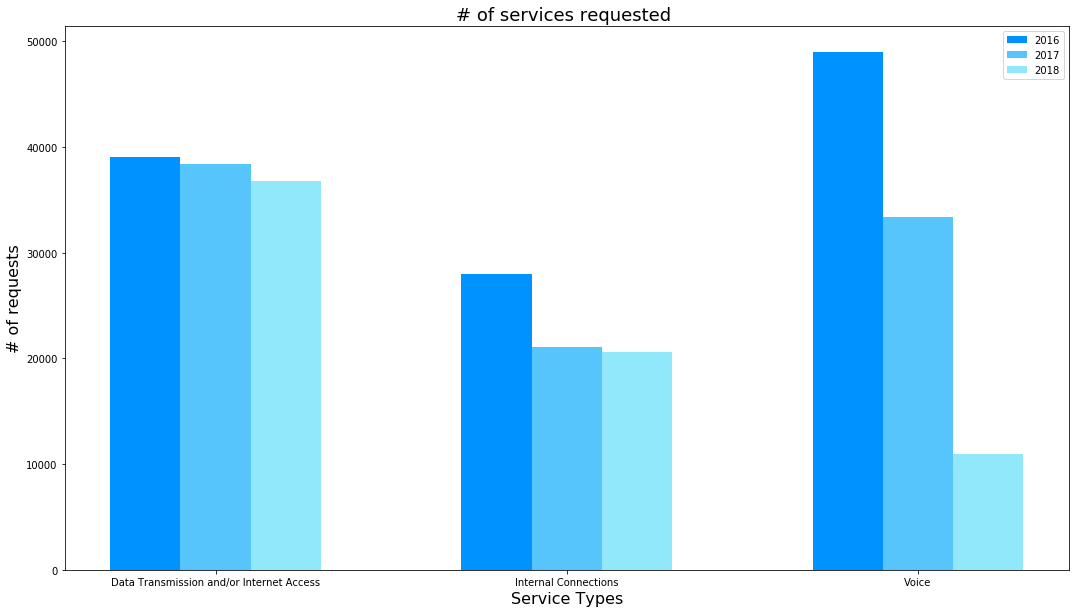

In [243]:
#Visualizing service types
year_2016 = service_types_request['Number_of_Requests_2016'].tolist()
year_2017 = service_types_request['Number_of_Requests_2017'].tolist()
year_2018 = service_types_request['Number_of_Requests_2018'].tolist()
services = service_types_request['Service'].tolist()
services_requesting=services
Year=['2016','2017','2018']
pos = np.arange(len(services_requesting))
bar_width = 0.20
services_Requested_2016=year_2016
services_Requested_2017=year_2017
services_Requested_2018=year_2018

r2 = [x + bar_width for x in pos]
r3 = [x + bar_width for x in r2]

plt.bar(pos,services_Requested_2016,bar_width,color='#0092ff')
plt.bar(r2,services_Requested_2017,bar_width,color='#55c5fb')
plt.bar(r3,services_Requested_2018,bar_width,color='#91e8fb')

 
plt.xticks(r2, services_requesting)
plt.xlabel('Service Types', fontsize=16)
plt.ylabel('# of requests', fontsize=16)
plt.title('# of services requested ',fontsize=18)
plt.legend(Year,loc=1)
plt.show()


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size






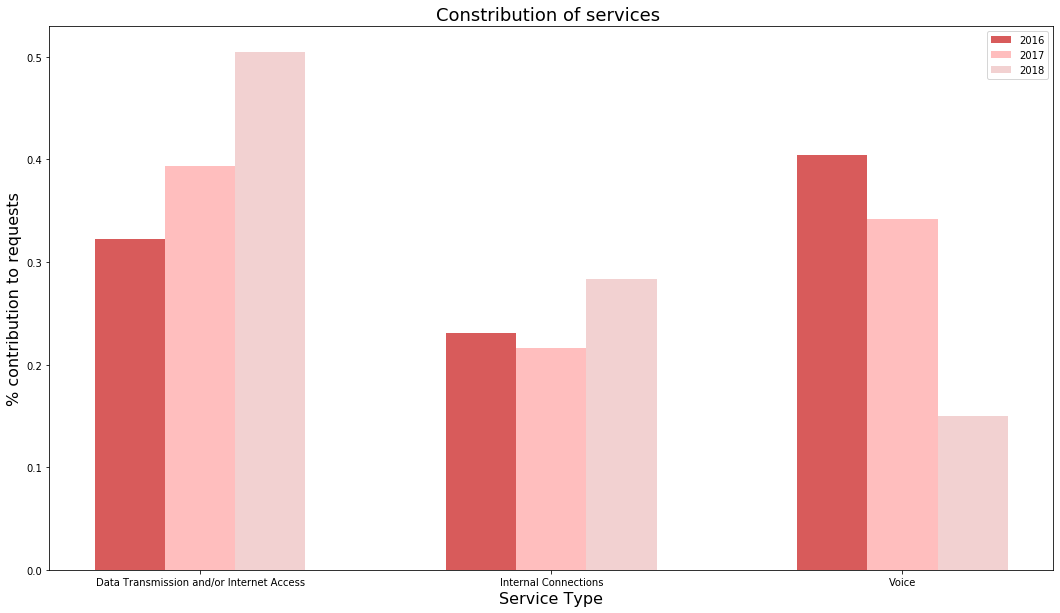

In [245]:
#Visualizing service types
year_2016 = service_types_request['Contribution_2016'].tolist()
year_2017 = service_types_request['Contribution_2017'].tolist()
year_2018 = service_types_request['Contribution_2018'].tolist()
services = service_types_request['Service'].tolist()
services_requesting=services
Year=['2016','2017','2018']
pos = np.arange(len(services_requesting))
bar_width = 0.20
services_Requested_2016=year_2016
services_Requested_2017=year_2017
services_Requested_2018=year_2018

r2 = [x + bar_width for x in pos]
r3 = [x + bar_width for x in r2]

plt.bar(pos,services_Requested_2016,bar_width,color='#d85b5b')
plt.bar(r2,services_Requested_2017,bar_width,color='#ffbebe')
plt.bar(r3,services_Requested_2018,bar_width,color='#f2d1d1')

 
plt.xticks(r2, services_requesting)
plt.xlabel('Service Type', fontsize=16)
plt.ylabel('% contribution to requests', fontsize=16)
plt.title('Constribution of services ',fontsize=18)
plt.legend(Year,loc=1)
plt.show()


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size






### 5. Organization-wise Funding Trend
1. The largest funding amount requester, NYC Department of Education, decreased requested amount by 23% from 2016 to 2018
2. All the top 5 organizations decreased their amount requested significantly from 2017
3. This drastic could be due to reasons
    1. Once organizations get large amount of funding, their requirement in subsequent year goes down as now lesser number of institutions are left to be connected. Hence the drop in amount
    2. It could also be because disbursment amount has been historically low, organizations have started requesting lesser amount now

In [268]:
# Out of ~25K organizations, below 5 contribute max. 
# They continue to be major contributors, just that amount has decreased for 2 reasons-
# 1. They have most of schools connected so amount will continue to decrease. 2. Disbursement amount approved has been low so they ask for lower amoun
org= ['TEACH WISCONSIN','NEW YORK CITY DEPARTMENT OF EDUCATION','CHICAGO PUBLIC SCHOOLS','CAROLINE EDUCATION COMMUNITY','LOWER KUSKOKWIM SCHOOL DIST']
top_5_org=dfr[dfr.organization_name.isin(org)]

#What type of services has been asked for
org_request = pd.pivot_table(top_5_org, index='organization_name', columns='funding_year', values= "funding_commitment_request",aggfunc= sum)


#Changing column names 
org_request = org_request.reset_index()
col_names = ('org_name','year_2016','year_2017','year_2018')
org_request.columns=col_names


#Calculating % of funding requested by state by year
org_request['org_contribution_2016'] = org_request.year_2016/funding_requested_2016
org_request['org_contribution_2017'] = org_request.year_2017/funding_requested_2017
org_request['org_contribution_2018'] = org_request.year_2018/funding_requested_2018

org_request

org_request['org_contribution_2016'] = org_request.year_2016/funding_requested_2016
org_request['org_contribution_2017'] = org_request.year_2017/funding_requested_2017
org_request['org_contribution_2018'] = org_request.year_2018/funding_requested_2018

org_request['year_2016'] = org_request['year_2016'].apply(lambda x: "${:.1f}M".format((x/1000000)))
org_request['year_2017'] = org_request['year_2017'].apply(lambda x: "${:.1f}M".format((x/1000000)))
org_request['year_2018'] = org_request['year_2018'].apply(lambda x: "${:.1f}M".format((x/1000000)))


org_request


org_contribution = org_request.loc[:,['org_name', 'org_contribution_2016','org_contribution_2017','org_contribution_2018']]
org_contribution






,org_name,org_contribution_2016,org_contribution_2017,org_contribution_2018
0,CHICAGO PUBLIC SCHOOLS,0.01,0.02,0.01
1,LOWER KUSKOKWIM SCHOOL DIST,0.01,0.02,0.01
2,NEW YORK CITY DEPARTMENT OF EDUCATION,0.02,0.03,0.02
3,TEACH WISCONSIN,0.01,0.06,0.00


In [266]:
org_years = org_request.loc[:,['org_name', 'year_2016','year_2017','year_2018']]
org_years

,org_name,year_2016,year_2017,year_2018
0,CHICAGO PUBLIC SCHOOLS,$27.5M,$64.2M,$39.2M
1,LOWER KUSKOKWIM SCHOOL DIST,$28.1M,$52.4M,$28.8M
2,NEW YORK CITY DEPARTMENT OF EDUCATION,$58.2M,$92.3M,$44.5M
3,TEACH WISCONSIN,$26.1M,$208.1M,$10.1M


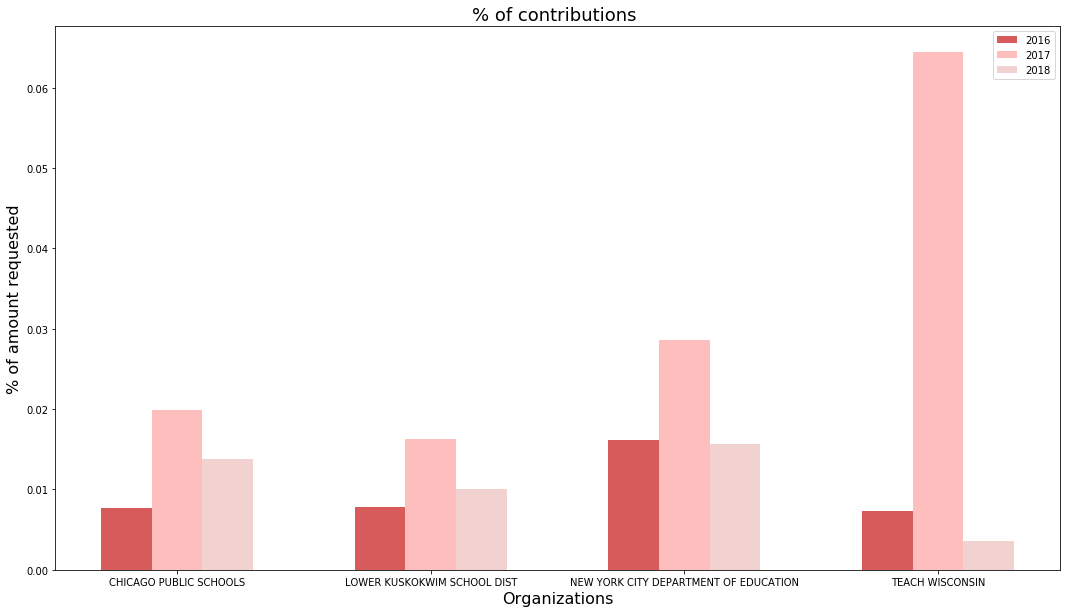

In [267]:
#Visualizing service types
year_2016 = org_request['org_contribution_2016'].tolist()
year_2017 = org_request['org_contribution_2017'].tolist()
year_2018 = org_request['org_contribution_2018'].tolist()
services = org_request['org_name'].tolist()
services_requesting=services
Year=['2016','2017','2018']
pos = np.arange(len(services_requesting))
bar_width = 0.20
services_Requested_2016=year_2016
services_Requested_2017=year_2017
services_Requested_2018=year_2018

r2 = [x + bar_width for x in pos]
r3 = [x + bar_width for x in r2]

plt.bar(pos,services_Requested_2016,bar_width,color='#d85b5b')
plt.bar(r2,services_Requested_2017,bar_width,color='#ffbebe')
plt.bar(r3,services_Requested_2018,bar_width,color='#f2d1d1')

 
plt.xticks(r2, services_requesting)
plt.xlabel('Organizations', fontsize=16)
plt.ylabel('% of amount requested', fontsize=16)
plt.title('% of contributions ',fontsize=18)
plt.legend(Year,loc=1)
plt.show()


# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

### 6. Source Code

In [207]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')